# Voluntary Python exercise

## Importing and combining data

Import pandas library:

In [1]:
import pandas as pd

Import datasets:

In [2]:
ages = pd.read_excel(r"C:\Users\h02281\Desktop\introduction to data analytics\python\data\average_ages.xlsx")
populations = pd.read_excel(r"C:\Users\h02281\Desktop\introduction to data analytics\python\data\average_populations.xlsx")

In [4]:
ages.head()

,area,average age
0,Akaa,44.9
1,Alajärvi,46.6
2,Alavieska,44.1
3,Alavus,46.4
4,Asikkala,50.0


In [5]:
populations.head()

,area,average population
0,Akaa,16429.0
1,Alajärvi,9365.0
2,Alavieska,2504.0
3,Alavus,11264.5
4,Asikkala,8046.0


Let's merge the two datasets:

In [6]:
tableBoth = ages.merge(populations, on="area", how="outer")

In [7]:
tableBoth.head()

,area,average age,average population
0,Akaa,44.9,16429.0
1,Alajärvi,46.6,9365.0
2,Alavieska,44.1,2504.0
3,Alavus,46.4,11264.5
4,Asikkala,50.0,8046.0


## Statistics

In [8]:
tableBoth['average age'].describe()

count    309.000000
mean      47.492557
std        4.591880
min       33.200000
25%       44.200000
50%       47.600000
75%       50.800000
max       56.900000
Name: average age, dtype: float64

In [9]:
tableBoth['average population'].describe()

count       309.000000
mean      17932.093851
std       49942.793711
min         103.000000
25%        2691.000000
50%        5991.500000
75%       14694.000000
max      657688.500000
Name: average population, dtype: float64

## Relationship between the variables

Let's calculate the correlation between the two variables:

In [10]:
tableBoth['average age'].corr(tableBoth['average population'])

-0.3063180422850269

There is a weak negative correlation between the two variables.

Let's import a new library to create some graphics:

In [11]:
import matplotlib
from matplotlib import pyplot as plt

Let's make a scatterplot:

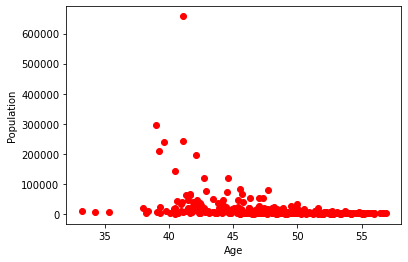

In [14]:
plt.plot(tableBoth['average age'], tableBoth['average population'], 'ro')
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

The connection is not very clearly visible. However, it seems that in municipalties with bigger population (at least 100000), the average age is around 40 years.

Let's divide the data into two parts: small and large municipalities.

In [15]:
tableSmall = tableBoth[tableBoth['average population']<100000]

In [16]:
tableLarge = tableBoth[tableBoth['average population']>=100000]

In [17]:
tableSmall.head()

,area,average age,average population
0,Akaa,44.9,16429.0
1,Alajärvi,46.6,9365.0
2,Alavieska,44.1,2504.0
3,Alavus,46.4,11264.5
4,Asikkala,50.0,8046.0


In [19]:
tableLarge.head(10)

,area,average age,average population
11,Espoo,39.0,294964.0
33,Helsinki,41.1,657688.5
62,Jyväskylä,40.5,143946.5
113,Kuopio,42.7,120876.5
122,Lahti,44.6,120005.5
179,Oulu,39.2,208439.0
267,Tampere,41.1,242616.0
275,Turku,42.1,194764.0
289,Vantaa,39.6,238218.5


Let's compare the two groups in terms of descriptive statistics:

In [20]:
tableSmall.describe()

,average age,average population
count,300.000000,300.000000
mean,47.684333,11064.995000
std,4.512723,14697.561937
min,33.200000,103.000000
25%,44.600000,2615.500000
50%,47.650000,5486.000000
75%,50.900000,12072.375000
max,56.900000,83583.000000


In [21]:
tableLarge.describe()

,average age,average population
count,9.000000,9.000000
mean,41.100000,246835.388889
std,1.817966,165049.990237
min,39.000000,120005.500000
25%,39.600000,143946.500000
50%,41.100000,208439.000000
75%,42.100000,242616.000000
max,44.600000,657688.500000


Roughly speaking, people in large municipalities are younger on average than people in small municipalities.